# Real Madrid vs. Barcelona: Which team was the best in 2008-2016? 


In this project, I will analyze performance of the two best Spanish football teams, **Real Madrid CF** and **FC Barcelona** in their matches in the Spanish Football League (La Liga) using European Soccer Database containing data from years 2008-2016.

<p align="center">
  <img 
    width="375"
    height="375"
    src="Real_Barca.jpg"
  >
</p>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Import packages and set plot parameters 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [2]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("database.sqlite")

Firs let's find out the team_api_IDs of the two most successfull spanish football teams, Real Madrid and Barcelona.

In [3]:
# Create a data frame from the results of SQL query containing team names and ids
ids = pd.read_sql_query("SELECT team_long_name, team_api_id "\
                        "FROM Team "\
                        "WHERE team_long_name IN ('Real Madrid CF', 'FC Barcelona')", con)

In [4]:
ids.head()

,team_long_name,team_api_id
0,Real Madrid CF,8633
1,FC Barcelona,8634


Let's now calculate home many home matches were played at home by Real Madrid, Barcelona and other teams.

In [5]:
# Create a data frame from the result of a SQL query with the official the official team names and the total
#number of matches played in la liga
home_matches=pd.read_sql_query("SELECT "\
                                  "CASE WHEN home_team_api_id = 8633 THEN 'Real Madrid CF' "\
                                       "WHEN home_team_api_id = 8634 THEN 'FC Barcelona' "\
                                       "ELSE 'Other' END AS home_team,"\
                                 "COUNT(id) AS total_matches "\
                               "FROM Match "\
                               "GROUP BY home_team",con)

In [6]:
home_matches.head()

,home_team,total_matches
0,FC Barcelona,152
1,Other,25675
2,Real Madrid CF,152


Let's now create a data frame with all the matches of Real Madrid.

## Getting Real Madrid matches results

In [7]:
#Create a data frame from the results of SQL query containing Real Madrid home matches results
real_home_matches=pd.read_sql_query("SELECT "\
                                         "m.date, "\
                                         "m.season, "\
                                         "t.team_long_name AS opponent, "\
                                         "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Win' "\
                                              "WHEN m.home_team_goal < m.away_team_goal THEN 'Loss' "\
                                              "ELSE 'Tie' END AS outcome "\
                                        "FROM Match AS m "\
                                        "LEFT JOIN Team AS t "\
                                        "ON m.away_team_api_id = t.team_api_id "\
                                        "WHERE m.home_team_api_id = 8633",con)

In [8]:
#Create a data frame from the results of SQL query containing Real Madrid away matches results
real_away_matches=pd.read_sql_query("SELECT "\
                                        "m.date, "\
                                        "m.season, "\
                                        "t.team_long_name AS opponent, "\
                                        "CASE WHEN m.home_team_goal < m.away_team_goal THEN 'Win' "\
                                             "WHEN m.home_team_goal > m.away_team_goal THEN 'Loss' "\
                                             "ELSE 'Tie' END AS outcome "\
                                        "FROM Match AS m "\
                                        "LEFT JOIN Team AS t "\
                                        "ON m.home_team_api_id = t.team_api_id "\
                                        "WHERE m.away_team_api_id = 8633",con)

In [9]:
# Create a data frame with all Real Madrid results
real_matches=pd.concat((real_home_matches,real_away_matches), ignore_index = True)

In [10]:
# Edding points column
real_matches['points']=0
real_matches['points'][real_matches.outcome=='Win']=3
real_matches['points'][real_matches.outcome=='Loss']=1

In [11]:
real_matches.head()

,date,season,opponent,outcome,points
0,2008-11-08 00:00:00,2008/2009,Málaga CF,Win,3
1,2008-11-22 00:00:00,2008/2009,RC Recreativo,Win,3
2,2008-12-07 00:00:00,2008/2009,Sevilla FC,Loss,1
3,2008-12-20 00:00:00,2008/2009,Valencia CF,Win,3
4,2009-01-04 00:00:00,2008/2009,Villarreal CF,Win,3


## How many matches did Real Madrid win and lose in 2008-2016?

In [12]:
#Calculate Real Madrid's wins, losses and ties
real_matches['outcome'].value_counts()

Win     228
Loss     40
Tie      36
Name: outcome, dtype: int64

As can be seen, in total,  Real Madrid won 228 and lost 40 La Liga matches in the seasons 2008/2009-2015/2016.

## Which team was the best rival of Real Madrid?

We will calculate this by fiding the teams who won against Real Madrid the greatest number of times.

In [13]:
# Calculate how many losses Real Madrid had against each opponent
real_matches[real_matches.outcome=='Loss'].groupby('opponent')['outcome'].value_counts().sort_values(ascending=False)

opponent                   outcome
FC Barcelona               Loss       10
Sevilla FC                 Loss        5
Atlético Madrid            Loss        4
Athletic Club de Bilbao    Loss        2
Valencia CF                Loss        2
Villarreal CF              Loss        2
Getafe CF                  Loss        2
CA Osasuna                 Loss        2
Levante UD                 Loss        1
Málaga CF                  Loss        1
RC Celta de Vigo           Loss        1
Granada CF                 Loss        1
RCD Mallorca               Loss        1
Real Betis Balompié        Loss        1
Real Sociedad              Loss        1
Real Sporting de Gijón     Loss        1
Real Valladolid            Loss        1
Real Zaragoza              Loss        1
RC Deportivo de La Coruña  Loss        1
Name: outcome, dtype: int64

FC Barcelona was the strongest rival for Real Madrid in 2008-2016 as Madrid lost 10 times to that team. 
The second strongest rival for Real Madrid was Sevilla FC, and Real Madrid's third strongest rival was Atletico Madrid.

## Real Madrid results in different seasons

In [14]:
# Define function to compare count plots for different categories
def countplot_compare(df,colname1,colname2,title,fsize):
    f, ax = plt.subplots(figsize=fsize)
    ax.set_title(title,fontsize=18)
    sns.countplot(x=colname1,hue=colname2, data=df,ax=ax)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()     

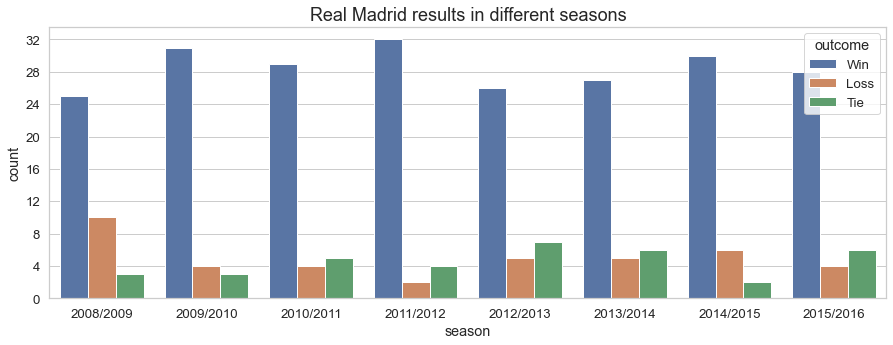

In [15]:
# Compare Wins, Ties and Losses in different seasons for Real Madrid
countplot_compare(real_matches,'season','outcome','Real Madrid results in different seasons',(15,5))

Using the plot above, we can analyze Real Madrid's reasults in different seasons over the years 2008-2016.

Overall, we can see that in all the seasons Real Madrid had a significantly larger number of wins than the number of losses or ties.

Apparently, the season 2011/2012 was the best  season for Real Madrid, as in that season  the team
won 32 times, had 4 ties and lost only twice.

As it can be noticed, Real Madrid's  worst season was the season 2008/2009 in which the team had the least amount of wins (25), the higest number of losses(10) and 3 ties.

## Getting Barcelona matches results

In [16]:
#Create a data frame from the results of SQL query containing Barcelona home matches results
barcelona_home_matches=pd.read_sql_query("SELECT "\
                                             "m.date, "\
                                             "m.season, "\
                                             "t.team_long_name AS opponent, "\
                                             "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Win' "\
                                                  "WHEN m.home_team_goal < m.away_team_goal THEN 'Loss' "\
                                                  "ELSE 'Tie' END AS outcome "\
                                             "FROM Match AS m "\
                                             "LEFT JOIN Team AS t "\
                                             "ON m.away_team_api_id = t.team_api_id "\
                                             "WHERE m.home_team_api_id = 8634",con)

In [17]:
#Create a data frame from the results of SQL query containing Barcelona away matches results
barcelona_away_matches=pd.read_sql_query("SELECT "\
                                             "m.date, "\
                                             "m.season, "\
                                             "t.team_long_name AS opponent, "\
                                             "CASE WHEN m.home_team_goal < m.away_team_goal THEN 'Win' "\
                                                  "WHEN m.home_team_goal > m.away_team_goal THEN 'Loss' "\
                                                  "ELSE 'Tie' END AS outcome "\
                                         "FROM Match AS m "\
                                         "LEFT JOIN Team AS t "\
                                         "ON m.home_team_api_id = t.team_api_id "\
                                         "WHERE m.away_team_api_id = 8634",con)

In [18]:
# Create a data frame with all Barcelona results
barcelona_matches=pd.concat((barcelona_home_matches,barcelona_away_matches), ignore_index = True)

In [19]:
# Add points column
barcelona_matches['points']=0
barcelona_matches['points'][barcelona_matches.outcome=='Win']=3
barcelona_matches['points'][barcelona_matches.outcome=='Loss']=1

In [20]:
barcelona_matches.head()

,date,season,opponent,outcome,points
0,2008-11-08 00:00:00,2008/2009,Real Valladolid,Win,3
1,2008-11-23 00:00:00,2008/2009,Getafe CF,Tie,0
2,2008-12-06 00:00:00,2008/2009,Valencia CF,Win,3
3,2008-12-13 00:00:00,2008/2009,Real Madrid CF,Win,3
4,2009-01-03 00:00:00,2008/2009,RCD Mallorca,Win,3


## How many matches did Barcelona win and lose in 2008-2016?

In [21]:
# Calculate Barcelona's wins, ties and losses
barcelona_matches['outcome'].value_counts()

Win     234
Tie      43
Loss     27
Name: outcome, dtype: int64

During the seasons 2008/2009-2015/2016, Barcelona won 234 and lost 27 La Liga matches, whereas as we have seen above, 
Real Madrid had 228 wins and 40 losses over that same period.

## Which team was the strongest rival for Barcelona?

In [22]:
# Calculate how many losses Barcelona had against each opponent
barcelona_matches[barcelona_matches.outcome=='Loss'].groupby('opponent')['outcome'].value_counts().sort_values(ascending=False)

opponent                 outcome
Real Sociedad            Loss       5
Real Madrid CF           Loss       4
Atlético Madrid          Loss       2
CA Osasuna               Loss       2
RC Celta de Vigo         Loss       2
Valencia CF              Loss       2
Athletic Club de Bilbao  Loss       1
CD Numancia              Loss       1
Getafe CF                Loss       1
Granada CF               Loss       1
Hércules Club de Fútbol  Loss       1
Málaga CF                Loss       1
RCD Espanyol             Loss       1
RCD Mallorca             Loss       1
Real Valladolid          Loss       1
Sevilla FC               Loss       1
Name: outcome, dtype: int64

Strikingly, the strongest rival for Barcelona in 2008-2016 was Real Sociedad that won 5 times against Barcelona, and according 
to our calculations, Real Madrid CF was Barcelona's only second strongest rival in 2008-2016.

## Barcelona results in different seasons

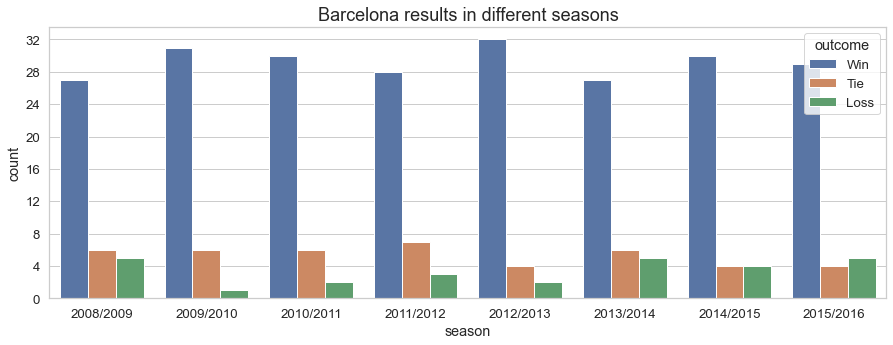

In [23]:
# Compare Wins, Ties and Losses in different seasons for Barcelona
countplot_compare(barcelona_matches,'season','outcome','Barcelona results in different seasons',(15,5))

As it can be seen, Barcelona's results were more stable in 2008-2016 as compared to Real Madrid's results. 
The total number of wins, losses and ties Barcelona had in each season varied only slightly over those years.

Overall, as in the case of Real Madrid, in every season, Barcelona had significantly greater number of wins than the number of losses or ties.

The best season for Barcelona was 2012/2013, when the team won 32 times, lost 4 times and had 2 ties. Interestingly, if we compare
Barcelona's results in this season with Real Madrid's results in its best season (2011/2012),
we can see that Real Madrid performed better that season than Barcelona in its best season.
Although, in their best seasons, both teams had 32 wins, Real Madrid performed better in its best season because the team lost only twice
and had 4 ties. In contrast, Barcelona lost 4 times and had ties twice during the team's best season.

The worst two seasons for Barcelona were 2013/2014 and 2008/2009 (curiously,the later was also the worst season for Real Madrid).
In those seasons Barcelona had the same results: 27 wins, 6 losses and 5 ties.

## Compare Real Madrid and Barcelona results in 2008-2016

Now, let's directrly compare the results Real Madrid and Barcelona had in 2008-2016.

First, let's calculate the number of points Real Madrid and Barcelona got in each season.

In [24]:
# Create a data frame with Real Madrid's and Barcelona's points in each season.
real_points=real_matches.groupby('season')['points'].sum().to_frame().reset_index(level=0)
barcelona_points=barcelona_matches.groupby('season')['points'].sum().to_frame().reset_index(level=0)
points=pd.merge(real_points,barcelona_points,how='left',on='season',suffixes=('_real', '_barcelona'))
points.head()

,season,points_real,points_barcelona
0,2008/2009,85,86
1,2009/2010,97,94
2,2010/2011,91,92
3,2011/2012,98,87
4,2012/2013,83,98


Now, let's calculate the number of wins the two teams had in each season.

In [25]:
# Create a data frame with Real Madrid's and Barcelona's numbers of wins in each season.
real_wins=real_matches[real_matches.outcome=='Win'].groupby('season')['outcome'].count().to_frame().reset_index(level=0)
barcelona_wins=barcelona_matches[barcelona_matches.outcome=='Win'].groupby('season')['outcome'].count().to_frame().reset_index(level=0)
wins=pd.merge(real_wins,barcelona_wins,how='left',on='season',suffixes=('_real', '_barcelona'))

Now, we will also calculate the number of losses Real Madrid and Barcelona had in every season.

In [26]:
# Create a data frame with Real Madrid's and Barcelona's numbers of losses in each season.
real_losses=real_matches[real_matches.outcome=='Loss'].groupby('season')['outcome'].count().to_frame().reset_index(level=0)
barcelona_losses=barcelona_matches[barcelona_matches.outcome=='Loss'].groupby('season')['outcome'].count().to_frame().reset_index(level=0)
losses=pd.merge(real_losses,barcelona_losses,how='left',on='season',suffixes=('_real', '_barcelona')).fillna(0)

And finally, we will calculate the number of tie both teams had in each season.

In [27]:
## Create a data frame with Real Madrid's and Barcelona's numbers of ties in each season.
real_ties=real_matches[real_matches.outcome=='Tie'].groupby('season')['outcome'].count().to_frame().reset_index(level=0)
barcelona_ties=barcelona_matches[barcelona_matches.outcome=='Tie'].groupby('season')['outcome'].count().to_frame().reset_index(level=0)
ties=pd.merge(real_ties,barcelona_ties,how='right',on='season',suffixes=('_real', '_barcelona')).fillna(0)

Let's now visualize the results!

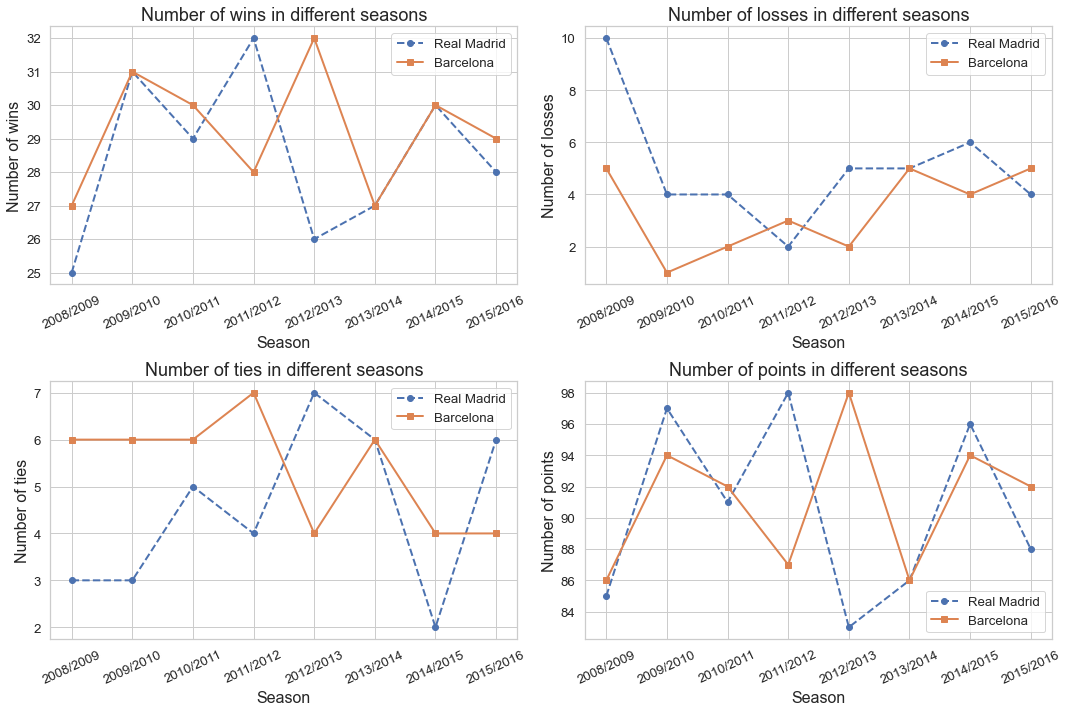

In [28]:
# Plot 4 subplots with wins, losses, ties and points of Real Madrid and Barcelona in different seasons
f,ax=plt.subplots(2,2,figsize=(15,10))

data=[wins,ties,losses,points]
ylab=['wins','ties','losses','points']
x=np.arange(wins.shape[0])

n=0

for col in range(2):
    for row in range(2):
            ax[row,col].plot(data[n]['season'],data[n].iloc[:,1],label='Real Madrid',marker='o',ls='--',lw=2)
            ax[row,col].plot(data[n]['season'],data[n].iloc[:,2],label='Barcelona',marker='s',lw=2)
            ax[row,col].legend()
            ax[row,col].set_xticklabels(ties.index,rotation=25)
            ax[row,col].set_xticks(x, (wins['season'].values))
            ax[row,col].set_ylabel('Number of '+ylab[n],fontsize=16)
            ax[row,col].set_xlabel('Season',fontsize=16)
            ax[row,col].set_title('Number of '+ylab[n]+ ' in different seasons',fontsize=18)
            n+=1
f.tight_layout()
plt.show()            

As we can see on the plot in the top left corner, curiously, Real Madrid and Barcelona had pretty similar number of wins
in every season (the difference was plus-minus 1-2 wins), except for the season 2011/2012 when Real Madrid had 4 more wins than Barcelona, and
the season 2012/2013 when Barcelona had 6 wins more than Real Madrid. Thus, it is not surprising that in 2011/2012 Real Madrid won La Liga
and in  2012/2013 Barcelona was the Spanish League Champion.

Furthermore, we can compare Real Madrid's and Barcelona's losses in each season by analyzing the plot in the right top corner.
We can see that, as in the case of the number of wins, the numbers of losses of the two teams were similar in almost every season,
although, Real Madrid had slightly more losses in the most seasons.
In 2008/2009, hovewer Real Madrid lost 5 times more than Barcelona, which is a lot. Accordingly, that season was won by Barcelona.

Additionally, we can compare how many ties Barcelona and Real Madrid had in each seson by analyzing the plot in the bottom 
left corner. We can see that in most seasons Barcelona had more ties than Real Madrid. 

Finally, we will compare the amount of points the two teams gained in each season. 
Unquestionably, the number of points gained by a team during a season is the most important indicatior of team's success or failure, as
this parameter defines the rank of the team in the season.
If we look at the plot in the bottom right corner, we will see that, in most of the seasons, Real Madrid and Barcelona gained
very similar amount of points (except for the seasons 2011/2012 and 2012/2013). 

Hovewer the team who gained more points became
a Champion during all corresponding seasons except for 2013/2014 - in that season Real Madrid and Barcelona had the same amount of points
(and curiously the same amount of wins, losses and ties) and neither of the teams got the Champion's title that season. 
In 2013/2014 La Liga was won by Atletico Madrid.

To conclude, overall in 2008-2016, Barcelona won La Liga 4 times, whereas Real Madrid became Chamipon only 3 times.

## El Clasico Analysis

Real Madrid and Barcelona have been rival teams for more than 80 years.
Matches between these two teams are given the name El Clasico.

Let's now analyze El Clasico matches happened that between the years 2008 and 2016!

In [29]:
#Create a data frame from the results of SQL query containing El Clasico matches results
el_clasico=pd.read_sql_query("SELECT "\
                                "date, "\
                                "season, "\
                                "CASE WHEN home_team_api_id = 8634 THEN 'FC Barcelona' "\
                                     "ELSE 'Real Madrid CF' END AS home, "\
                                "CASE WHEN away_team_api_id = 8634 THEN 'FC Barcelona' "\
                                     "ELSE 'Real Madrid CF' END AS away, "\
                                "CASE WHEN home_team_goal > away_team_goal AND home_team_api_id = 8634 THEN 'Barcelona win' "\
                                    "WHEN home_team_goal > away_team_goal AND home_team_api_id = 8633 THEN 'Real Madrid win' "\
                                    "WHEN home_team_goal < away_team_goal AND away_team_api_id = 8634 THEN 'Barcelona win' "\
                                    "WHEN home_team_goal < away_team_goal AND away_team_api_id = 8633 THEN 'Real Madrid win' "\
                                    "ELSE 'Tie' END AS outcome, "\
                                "home_team_goal AS home_goals, "\
                                "away_team_goal AS away_goals "\
                              "FROM Match "\
                             "WHERE (away_team_api_id = 8634 OR home_team_api_id = 8634) "\
                                  " AND (away_team_api_id = 8633 OR home_team_api_id = 8633)",con)

In [30]:
el_clasico.head()

,date,season,home,away,outcome,home_goals,away_goals
0,2008-12-13 00:00:00,2008/2009,FC Barcelona,Real Madrid CF,Barcelona win,2,0
1,2009-05-02 00:00:00,2008/2009,Real Madrid CF,FC Barcelona,Barcelona win,2,6
2,2009-11-29 00:00:00,2009/2010,FC Barcelona,Real Madrid CF,Barcelona win,1,0
3,2010-04-10 00:00:00,2009/2010,Real Madrid CF,FC Barcelona,Barcelona win,0,2
4,2010-11-29 00:00:00,2010/2011,FC Barcelona,Real Madrid CF,Barcelona win,5,0


In [31]:
# Calculate the number of wins, losses and ties for home and away team in el clasico matches
el_clasico.groupby('outcome')['home','away'].value_counts()

outcome          home            away          
Barcelona win    FC Barcelona    Real Madrid CF    5
                 Real Madrid CF  FC Barcelona      5
Real Madrid win  FC Barcelona    Real Madrid CF    2
                 Real Madrid CF  FC Barcelona      2
Tie              FC Barcelona    Real Madrid CF    1
                 Real Madrid CF  FC Barcelona      1
dtype: int64

We can see that, in 2008-2016, Barcelona won 10 times against Real Madrid (among those matches, Barcelona played 5 times at home 
                                                                          and 5 times away).

During that same period, in 2008-2016, Real Madrid won 4 times against Barcelona (among those 4 matches, 2 times Real Madrid played at home and 2 other
                                                                                times it played away).
                                                                                
In addition, in the years 2008-2016, Real Madrid and Barcelona had 2 matches between them that ended with a tie (1 of those matches was held
                                                                                                   in Madrid and the other one - in Barcelona).

### El Clasico matches results in different seasons

Let's now analyze the results of El Clasico matches from different seasons.

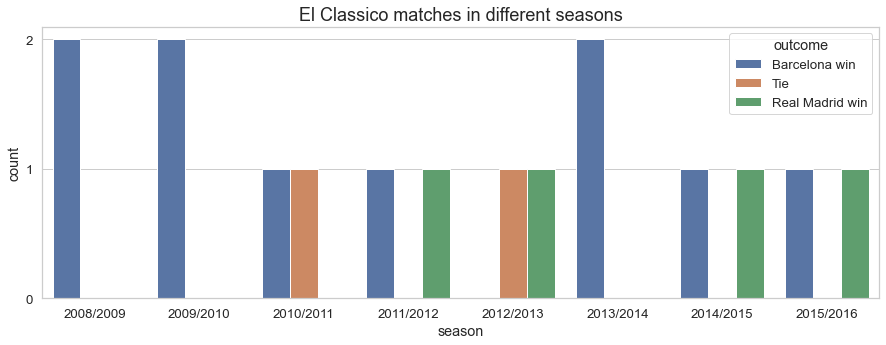

In [32]:
# Plot a comparative countplot
countplot_compare(el_clasico,'season','outcome','El Classico matches in different seasons',(15,5))

In [33]:
# Calculate home team wins, ties and losses
el_clasico.groupby('season')['home','outcome'].value_counts()

season     home            outcome        
2008/2009  FC Barcelona    Barcelona win      1
           Real Madrid CF  Barcelona win      1
2009/2010  FC Barcelona    Barcelona win      1
           Real Madrid CF  Barcelona win      1
2010/2011  FC Barcelona    Barcelona win      1
           Real Madrid CF  Tie                1
2011/2012  FC Barcelona    Real Madrid win    1
           Real Madrid CF  Barcelona win      1
2012/2013  FC Barcelona    Tie                1
           Real Madrid CF  Real Madrid win    1
2013/2014  FC Barcelona    Barcelona win      1
           Real Madrid CF  Barcelona win      1
2014/2015  FC Barcelona    Barcelona win      1
           Real Madrid CF  Real Madrid win    1
2015/2016  FC Barcelona    Real Madrid win    1
           Real Madrid CF  Barcelona win      1
dtype: int64

The plot above can tell us everything about El Clasico matches played in seasons 2008/2009-2015/2016.

Obviously, in each season, Real Madrid and Barcelona played twice withing the Spanish Football League (La Liga).

In the seasons 2008/2009 and 2009/2010, Barcelona won both matches against Real Madrid (both, home and away matches).

In the season 2010/2011 Barcelona won once against Real Madrid (as we can see above, it happended in Barcelona), and the other
El Clasico match that occured in Madrid in that season ended with a tie.

In the season 2011/2012, Barcelona won once against Real Madrid in Madrid, and Real Madrid won another match held in Barcelona.

In the season 2012/2013, there was one tie between Barcelona and Real Madrid in the match played in Barcelona, and the match
held in Madrid was won by Real Madrid.

In the season 2013/2014, the two El Clasico matches of La Liga were won by Barcelona.

In the season 2014/2015, one of the matches was won by Barcelona (in Barcelona), and the other match which was held in Madrid was
won by Real Madrid.

In the season 2015/2016 again, one of the matches was won by Barcelona (that match was held in Madrid), and the other match
held in Barcelona was won by Real Madrid.

Overall, we can conclude that Barcelona had more success in El Clasico matches throughout the seasons 2008/2009 - 2015/2016.

### How many goals Real Madrid and Barcelona scored in El Clasico matches?

In [34]:
# Calculate home team goals for each of the teams
el_clasico.groupby('home')['home_goals'].sum()

home
FC Barcelona      16
Real Madrid CF    12
Name: home_goals, dtype: int64

In [35]:
# Calculate away team goals for each of the teams
el_clasico.groupby('away')['away_goals'].sum()

away
FC Barcelona      22
Real Madrid CF     8
Name: away_goals, dtype: int64

We can see that, in total in all El Clasico matches played in 2008-2016 within La Liga, Barcelona scored 16 goals in home matches and 22 goals
in away matches. Whereas Real Madrid scored in total 12 goals at home and 8 goals away in El Clasico matches.

In [36]:
# Goals statistics
el_clasico[['home_goals','away_goals']].describe()

,home_goals,away_goals
count,16.000000,16.000000
mean,1.750000,1.875000
std,1.238278,1.668333
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,1.500000
75%,2.000000,2.250000
max,5.000000,6.000000


Although one can believe that it is easier to play and score goals when a team plays at home, we can see that in El Clasico matches the teams scored on average 1.75 goals when they played at home and 1.88 goals when
they played away.

Interestingly, the maximum number of goals scored by a home team and an away team in El Classico matches were 5 and 6 goals
correspondingly. Those are quite good results. Let's see which of the two teams scored that much in El Clasico matches.

In [37]:
el_clasico[el_clasico.home_goals==5]

,date,season,home,away,outcome,home_goals,away_goals
4,2010-11-29 00:00:00,2010/2011,FC Barcelona,Real Madrid CF,Barcelona win,5,0


We can see that the team that scored 5 goals was Barcelona. It happended in the season 2010/2011 when Barcelona played at home
and won against Real Madrid 5:0.

In [38]:
el_clasico[el_clasico.away_goals==6]

,date,season,home,away,outcome,home_goals,away_goals
1,2009-05-02 00:00:00,2008/2009,Real Madrid CF,FC Barcelona,Barcelona win,2,6


The team that scored the maximum number of goals in El Clasico matches was also Barcelona. 
It happended in the season 2008/2009 when Barcelona won 6:2 against Real Madrid in Madrid. 

### Goals in El Clasico matches in different seasons

Now, to analyze the goals scored in El Clasico matches in different seasons, we will construct a data frame with the following columns:
    
**season** column;\
**real_home_goals** column which will contain the number of goals Real Madrid scored in EL Clasico matches in each season as
    a home team;\
**real_away_goals** column which will contain the number of goals Real Madrid scored in EL Clasico matches in each season as
    an away team;\
**barcelona_home_goals** column which will contain the number of goals Barcelona scored in EL Clasico matches in each season as
    a home team;\
**barcelona_away_goals** column which will contain the number of goals Barcelona scored in EL Clasico matches in each season as
    an away team;\
**real_total_goals** column which will contain the total number of goals Real Madrid scored in El Clasico matches in each seson;\
**barcelona_total_goals** column which will contain the total number of goals Barcelona scored in El Clasico matches in each season.
        

For the sake of excersize, we will construct this data frame in two different ways:
1) by manipulating the **el_clasico** data frame with pandas\
2) by means of a SQL query 
    
        

**Contructing a data frame with goals in different seasons with pandas using el_clasico data frame**

In [39]:
real_home_barcelona_away=el_clasico[el_clasico.home=='Real Madrid CF'].groupby('season')['home_goals',
                                                                                         'away_goals'].sum().reset_index()
barcelona_home_real_away=el_clasico[el_clasico.home=='FC Barcelona'].groupby('season')['home_goals',
                                                                                       'away_goals'].sum().reset_index()

In [40]:
real_home_barcelona_away.rename(columns={"home_goals": "real_home_goals", "away_goals": "barcelona_away_goals"},inplace=True)
barcelona_home_real_away.rename(columns={"home_goals": "barcelona_home_goals", "away_goals": "real_away_goals"},inplace=True)
goals_pandas=pd.merge(real_home_barcelona_away,barcelona_home_real_away,how='left',on='season')
goals_pandas['real_total_goals']=goals_pandas['real_home_goals']+goals_pandas['real_away_goals']
goals_pandas['barcelona_total_goals']=goals_pandas['barcelona_home_goals']+goals_pandas['barcelona_away_goals']
goals_pandas=goals_pandas[['season','real_home_goals','real_away_goals','barcelona_home_goals','barcelona_away_goals',
                           'real_total_goals','barcelona_total_goals']]

**Constructing the same data frame with a SQL query**

In [41]:
goals_sql=pd.read_sql_query("SELECT "\
                               "season, "\
                               "real_home_goals, "\
                               "real_away_goals, "\
                               "barcelona_home_goals, "\
                               "barcelona_away_goals, "\
                               "(real_home_goals+real_away_goals) AS real_total_goals, "\
                               "(barcelona_home_goals+barcelona_away_goals) AS barcelona_total_goals "\
                          "FROM "\
                               "(SELECT "\
                                    "season, "\
                                    "SUM(CASE WHEN home_team_api_id = 8633 THEN home_team_goal END) AS real_home_goals, "\
                                    "SUM(CASE WHEN away_team_api_id = 8633 THEN away_team_goal END) AS real_away_goals, "\
                                    "SUM(CASE WHEN home_team_api_id = 8634 THEN home_team_goal END) AS barcelona_home_goals, "\
                                    "SUM(CASE WHEN away_team_api_id = 8634 THEN away_team_goal END) AS barcelona_away_goals "\
                              "FROM Match "\
                              "WHERE (away_team_api_id = 8634 OR home_team_api_id = 8634) "\
                                    "AND (away_team_api_id = 8633 OR home_team_api_id = 8633) "\
                              "GROUP BY season) AS subq",con) 

If we compare the data frames, we will see that they are identical.

In [42]:
goals_pandas  

,season,real_home_goals,real_away_goals,barcelona_home_goals,barcelona_away_goals,real_total_goals,barcelona_total_goals
0,2008/2009,2,0,2,6,2,8
1,2009/2010,0,0,1,2,0,3
2,2010/2011,1,0,5,1,1,6
3,2011/2012,1,2,1,3,3,4
4,2012/2013,2,2,2,1,4,3
5,2013/2014,3,1,2,4,4,6
6,2014/2015,3,1,2,1,4,3
7,2015/2016,0,2,1,4,2,5


In [43]:
goals_sql

,season,real_home_goals,real_away_goals,barcelona_home_goals,barcelona_away_goals,real_total_goals,barcelona_total_goals
0,2008/2009,2,0,2,6,2,8
1,2009/2010,0,0,1,2,0,3
2,2010/2011,1,0,5,1,1,6
3,2011/2012,1,2,1,3,3,4
4,2012/2013,2,2,2,1,4,3
5,2013/2014,3,1,2,4,4,6
6,2014/2015,3,1,2,1,4,3
7,2015/2016,0,2,1,4,2,5


Let's now visualize the goals the two teams scored in El Clasico matches in different seasons.

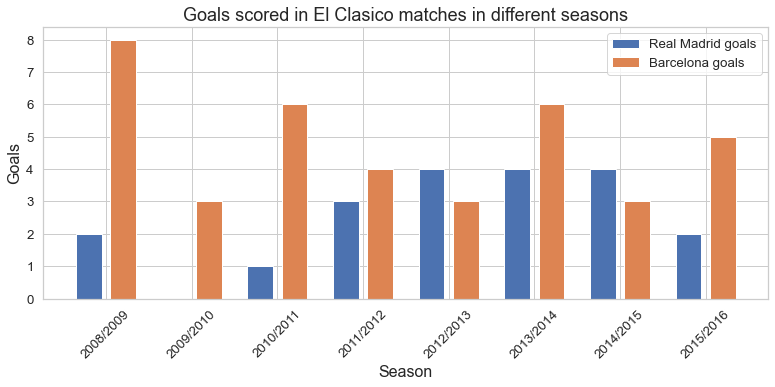

In [44]:
# Create a Bar plot to compare El Clasico goals in each season
f,ax=plt.subplots(figsize=(13,5))
x = np.arange(goals_sql.shape[0])
ax.set_title('Goals scored in El Clasico matches in different seasons',fontsize=18)
ax.bar(x-0.2,goals_sql['real_total_goals'] , 0.3, label='Real Madrid goals')
ax.bar(x+0.2, goals_sql['barcelona_total_goals'], 0.3, label='Barcelona goals')
ax.set_xticks(x, goals_sql['season'].values,rotation=45)
plt.legend(loc='best')
plt.xlabel('Season',fontsize=16)
plt.ylabel('Goals',fontsize=16)
plt.show()

We can see that, in most of the seasons, Barcelona scored more goals in El Clasico matches than Real Madrid.

For instance, in the season 2008/2009 Barcelona scored 8 goals in macthes against Real Madrid, whereal Real Madrid scored only
two goals in those matches. 

In the season 2009/2010, Barcelona scored 3 goals in El Clasico matches, while Real Madrid did not
score at all.

In the season 2010/2011 Barcelona scored 6 goals in El Clasico matches, whereas Real Madrid only scored 1 goal.

Also, in 2011/2012 Barcelona scored 4 goals in El Clasico matches, while Real Madrid scored 3 goals.

Further, in the season 2013/2014, Barcelona scored 6 goals and Real Madrid only scored 4 goals in El Clasico matches.

Finally, in the season 2015/2016, Barcelona scored 5 goals, whereas Real Madrid only scored twice in El Clasico matches.

In contrast, there were only two seasons in the period between 2008 and 2016 in which Real Madrid scored more goals
than Barcelona: the seasons 2012/2013 and 2014/2015.

In the season 2012/2013 Real Madrid scored  4 goals, whereas Barcelona scored 3 goals in that season, and in the season
2014/2015, the two team scored the same number of goals in matches agains each other as in the season 2012/2013.

## Greatest vicrories and greatest defeats of Real Madrid and Barcelona in 2008-2016

Now, we will use SQL queries to determine matches in which Real Madrid and Barcelona won or lost with the highest score difference.
Those results would mean the greatest victories or the greatest defeats of the teams correspondingly.

### Greatest victories of Real Madrid

In [45]:
# Create a fata frame containing results of the matches in which Madrid won with the highest difference in score
#The results will be ranked from the best to the worst match
real_best_matches=pd.read_sql_query("WITH home AS ( "\
                                       "SELECT m.id, t.team_long_name, "\
                                         "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Real Madrid Win'"\
                                           "WHEN m.home_team_goal < m.away_team_goal THEN 'Real Madrid Loss' "\
                                             "ELSE 'Tie' END AS outcome "\
                                       "FROM Match AS m "\
                                       "LEFT JOIN team AS t ON m.home_team_api_id = t.team_api_id), "\
                                    "away AS ( "\
                                       "SELECT m.id, t.team_long_name, "\
                                         "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Real Madrid Loss' "\
                                           "WHEN m.home_team_goal < m.away_team_goal THEN 'Real Madrid Win' "\
                                             "ELSE 'Tie' END AS outcome "\
                                       "FROM Match AS m "\
                                       "LEFT JOIN team AS t ON m.away_team_api_id = t.team_api_id) "\
                                    "SELECT DISTINCT "\
                                          "date, "\
                                          "season, "\
                                          "home.team_long_name AS home_team, "\
                                          "away.team_long_name AS away_team, "\
                                          "m.home_team_goal, m.away_team_goal,"\
                                          "RANK() OVER(ORDER BY ABS(home_team_goal - away_team_goal) DESC) as match_rank "\
                                    "FROM Match AS m "\
                                    "LEFT JOIN home ON m.id = home.id "\
                                    "LEFT JOIN away ON m.id = away.id "\
                                    "WHERE "\
                                        "((home.team_long_name = 'Real Madrid CF' AND home.outcome = 'Real Madrid Win') "\
                                          "OR (away.team_long_name = 'Real Madrid CF' AND away.outcome = 'Real Madrid Win')) ",
                                     con)

In [46]:
real_best_matches.head()

,date,season,home_team,away_team,home_team_goal,away_team_goal,match_rank
0,2015-04-05 00:00:00,2014/2015,Real Madrid CF,Granada CF,9,1,1
1,2015-12-20 00:00:00,2015/2016,Real Madrid CF,Rayo Vallecano,10,2,1
2,2011-03-03 00:00:00,2010/2011,Real Madrid CF,Málaga CF,7,0,3
3,2011-05-21 00:00:00,2010/2011,Real Madrid CF,UD Almería,8,1,3
4,2008-09-24 00:00:00,2008/2009,Real Madrid CF,Real Sporting de Gijón,7,1,5


We can see that Real Madrid had its greatest victory when the team won against Granada CF 9:1 in the season 2014/2015.
We can compare this success of Real Madrid with the time the team won against Rayo Vallecano 10:2 in the season 2015/2016.    

### Greatest defeats of Real Madrid

In [47]:
# Create a fata frame containing results of the matches in which Madrid lost with the highest difference in score
#The results will be ranked from the worst to the best match
real_worst_matches=pd.read_sql_query("WITH home AS ( "\
                                       "SELECT m.id, t.team_long_name, "\
                                         "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Real Madrid Win'"\
                                           "WHEN m.home_team_goal < m.away_team_goal THEN 'Real Madrid Loss' "\
                                             "ELSE 'Tie' END AS outcome "\
                                       "FROM Match AS m "\
                                       "LEFT JOIN team AS t ON m.home_team_api_id = t.team_api_id), "\
                                    "away AS ( "\
                                       "SELECT m.id, t.team_long_name, "\
                                         "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Real Madrid Loss' "\
                                           "WHEN m.home_team_goal < m.away_team_goal THEN 'Real Madrid Win' "\
                                             "ELSE 'Tie' END AS outcome "\
                                       "FROM Match AS m "\
                                       "LEFT JOIN team AS t ON m.away_team_api_id = t.team_api_id) "\
                                    "SELECT DISTINCT "\
                                          "date, "\
                                          "season, "\
                                          "home.team_long_name AS home_team, "\
                                          "away.team_long_name AS away_team, "\
                                          "m.home_team_goal, m.away_team_goal,"\
                                          "RANK() OVER(ORDER BY ABS(home_team_goal - away_team_goal) DESC) as match_rank "\
                                    "FROM Match AS m "\
                                    "LEFT JOIN home ON m.id = home.id "\
                                    "LEFT JOIN away ON m.id = away.id "\
                                    "WHERE "\
                                        "((home.team_long_name = 'Real Madrid CF' AND home.outcome = 'Real Madrid Loss') "\
                                          "OR (away.team_long_name = 'Real Madrid CF' AND away.outcome = 'Real Madrid Loss')) ",
                                     con)

In [48]:
real_worst_matches.head()

,date,season,home_team,away_team,home_team_goal,away_team_goal,match_rank
0,2010-11-29 00:00:00,2010/2011,FC Barcelona,Real Madrid CF,5,0,1
1,2009-05-02 00:00:00,2008/2009,Real Madrid CF,FC Barcelona,2,6,2
2,2015-02-07 00:00:00,2014/2015,Atlético Madrid,Real Madrid CF,4,0,2
3,2015-11-21 00:00:00,2015/2016,Real Madrid CF,FC Barcelona,0,4,2
4,2009-05-09 00:00:00,2008/2009,Valencia CF,Real Madrid CF,3,0,5


We can see that three of the five greatest defeats of Real Madrid in 2008-2009 were from Barcelona:
    when Barcelona won 5:0, 6:2 and 4:0 in years 2010, 2009 and 2015 correspondingly.

### Greatest victories of Barcelona

In [49]:
# Create a fata frame containing results of the matches in which Barcelona won with the highest difference in score
#The results will be ranked from the best to the worst match
barcelona_best_matches=pd.read_sql_query("WITH home AS ( "\
                                              "SELECT m.id, t.team_long_name, "\
                                                 "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Barcelona Win'"\
                                                    "WHEN m.home_team_goal < m.away_team_goal THEN 'Barcelona Loss' "\
                                                      "ELSE 'Tie' END AS outcome "\
                                              "FROM Match AS m "\
                                              "LEFT JOIN team AS t ON m.home_team_api_id = t.team_api_id), "\
                                           "away AS ( "\
                                              "SELECT m.id, t.team_long_name, "\
                                                "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Barcelona Loss' "\
                                                   "WHEN m.home_team_goal < m.away_team_goal THEN 'Barcelona Win' "\
                                                     "ELSE 'Tie' END AS outcome "\
                                              "FROM Match AS m "\
                                              "LEFT JOIN team AS t ON m.away_team_api_id = t.team_api_id) "\
                                          "SELECT DISTINCT "\
                                               "date, "\
                                               "season,"\
                                               "home.team_long_name AS home_team, "\
                                               "away.team_long_name AS away_team, "\
                                               "m.home_team_goal, m.away_team_goal,"\
                                               "RANK() OVER(ORDER BY ABS(home_team_goal - away_team_goal) DESC) as match_rank "\
                                         "FROM Match AS m "\
                                         "LEFT JOIN home ON m.id = home.id "\
                                         "LEFT JOIN away ON m.id = away.id "\
                                         "WHERE "\
                                              "((home.team_long_name = 'FC Barcelona' AND home.outcome = 'Barcelona Win') "\
                                              "OR (away.team_long_name = 'FC Barcelona' AND away.outcome = 'Barcelona Win')) ",
                                          con)

In [50]:
barcelona_best_matches.head()

,date,season,home_team,away_team,home_team_goal,away_team_goal,match_rank
0,2010-11-20 00:00:00,2010/2011,UD Almería,FC Barcelona,0,8,1
1,2011-09-17 00:00:00,2011/2012,FC Barcelona,CA Osasuna,8,0,1
2,2015-05-02 00:00:00,2014/2015,Córdoba CF,FC Barcelona,0,8,1
3,2016-04-20 00:00:00,2015/2016,RC Deportivo de La Coruña,FC Barcelona,0,8,1
4,2012-04-29 00:00:00,2011/2012,Rayo Vallecano,FC Barcelona,0,7,5


We can see that Barcelona's greatest wins were when it won with the same result of 8:0 against UD Almeria in 2010, CA Osasuna in 2011,
Cordoba CF in 2015 and RC Deportivo de La Coruna in 2016.

### Greatest defeats of Barcelona

In [51]:
# Create a fata frame containing results of the matches in which Barcelona lost with the highest difference in score
#The results will be ranked from the worst to the best match
barcelona_worst_matches=pd.read_sql_query("WITH home AS ( "\
                                              "SELECT m.id, t.team_long_name, "\
                                                 "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Barcelona Win'"\
                                                    "WHEN m.home_team_goal < m.away_team_goal THEN 'Barcelona Loss' "\
                                                      "ELSE 'Tie' END AS outcome "\
                                              "FROM Match AS m "\
                                              "LEFT JOIN team AS t ON m.home_team_api_id = t.team_api_id), "\
                                           "away AS ( "\
                                              "SELECT m.id, t.team_long_name, "\
                                                "CASE WHEN m.home_team_goal > m.away_team_goal THEN 'Barcelona Loss' "\
                                                   "WHEN m.home_team_goal < m.away_team_goal THEN 'Barcelona Win' "\
                                                     "ELSE 'Tie' END AS outcome "\
                                              "FROM Match AS m "\
                                              "LEFT JOIN team AS t ON m.away_team_api_id = t.team_api_id) "\
                                          "SELECT DISTINCT "\
                                               "date, "\
                                               "season,"\
                                               "home.team_long_name AS home_team, "\
                                               "away.team_long_name AS away_team, "\
                                               "m.home_team_goal, m.away_team_goal,"\
                                               "RANK() OVER(ORDER BY ABS(home_team_goal - away_team_goal) DESC) as match_rank "\
                                         "FROM Match AS m "\
                                         "LEFT JOIN home ON m.id = home.id "\
                                         "LEFT JOIN away ON m.id = away.id "\
                                         "WHERE "\
                                              "((home.team_long_name = 'FC Barcelona' AND home.outcome = 'Barcelona Loss') "\
                                              "OR (away.team_long_name = 'FC Barcelona' AND away.outcome = 'Barcelona Loss')) ",
                                          con)

In [52]:
barcelona_worst_matches.head()

,date,season,home_team,away_team,home_team_goal,away_team_goal,match_rank
0,2015-09-23 00:00:00,2015/2016,RC Celta de Vigo,FC Barcelona,4,1,1
1,2010-09-11 00:00:00,2010/2011,FC Barcelona,Hércules Club de Fútbol,0,2,2
2,2014-02-22 00:00:00,2013/2014,Real Sociedad,FC Barcelona,3,1,2
3,2014-10-25 00:00:00,2014/2015,Real Madrid CF,FC Barcelona,3,1,2
4,2008-08-31 00:00:00,2008/2009,CD Numancia,FC Barcelona,1,0,5


As we can see, the greatest defeat for Barcelona over the period of 2008-2016 was when the team lost 1:4 to Celta de Vigo in 2015.

In addition, the matches in wich Barcelona lost 0:2 to Hercules, 1:3 to Real Sociedad and 1:3 to Real Madrid are among the greatest defeats of Barcelona.
            
Overall, we can conclude that it was really rare for Barcelona to lose with the goal difference greater than one.



To conclude, in this notebook, we have seen that Barcelona was more successful in La Liga matches during the years 2008-2016 than
its greatest rival - Real Madrid.

Barcelona won more matches and lost less matches than Real Madrid, and more importantly, Barcelona won more Champion titles than
Real Madrid over that period of time.

In addition, Barcelona was slightly more successful in El Clasico matches than Real Madrid: Barcelona won more times and scored
more. 